# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


In [2]:
pip install imblearn

You should consider upgrading via the '/Users/tejashriprabhu/miniforge3/envs/env_tf/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

You should consider upgrading via the '/Users/tejashriprabhu/miniforge3/envs/env_tf/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cmake

You should consider upgrading via the '/Users/tejashriprabhu/miniforge3/envs/env_tf/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

You should consider upgrading via the '/Users/tejashriprabhu/miniforge3/envs/env_tf/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# API for students

In [6]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [7]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [8]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

## Converting the object data to numeric (Float)

In [10]:
#apply the to_numeric transform to all the columns that have a Dtype as object 
#coerce will make the invalid parsing will be set as NaN
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

In [11]:
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training dataset:", (X_train.shape))
print("Training Labels:",(y_train.shape))
print("Testing dataset:",X_test.shape)
print("Testing Labels:",y_test.shape)

Training dataset: (3854, 64)
Training Labels: (3854,)
Testing dataset: (964, 64)
Testing Labels: (964,)


# Baseline Model: NaiveBayes

For the baseline model, we choose NaiveBayes as it is a much faster classifier. Since, it assumes independence, it can assume each individual feature has its own distribution (https://scikit-learn.org/stable/modules/naive_bayes.html)

To handle missing data, we use a SimpleImputer that imputes a strategy of median to fill the missing data

In [12]:
#Pipeline with Imputer and Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(SimpleImputer(strategy ='median'),GaussianNB())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gaussiannb', GaussianNB())])

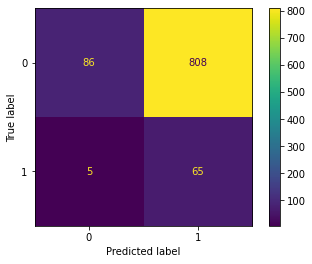

              precision    recall  f1-score   support

           0       0.95      0.10      0.17       894
           1       0.07      0.93      0.14        70

    accuracy                           0.16       964
   macro avg       0.51      0.51      0.16       964
weighted avg       0.88      0.16      0.17       964




In [13]:
#Performance Metrics Libraries
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_pred)}\n")

In [14]:
print("The Baseline Model is SimpleImputer with mean strategy and NaiveBayes")
print("Baseline accuracy score: {:3.4f} ".format(accuracy_score(y_test,y_pred)))
print("Baseline balanced accuracy score:{:3.4f} ".format(balanced_accuracy_score(y_test, y_pred,adjusted=False)))
print("Baseline Precision score: {:3.4f} ".format((precision_score(y_test,y_pred))))
print("Baseline Recall score: {:3.4f} ".format((recall_score(y_test,y_pred))))

The Baseline Model is SimpleImputer with mean strategy and NaiveBayes
Baseline accuracy score: 0.1566 
Baseline balanced accuracy score:0.5124 
Baseline Precision score: 0.0745 
Baseline Recall score: 0.9286 


Our Baseline Model 'The NaiveBayes' does a good job of predicting bankrupt companies as bankrupt, but it grossly misclassifies solvent companies as bankrupt (True Label = 0; predicted Label =1). Additionally it also has a poor accuracy and balanced accuracy score. Our aim is to find sophisticated models that perform better than our baseline

# Exploratory Data Analysis (EDA)

## Checking for Data Imbalance

In [15]:
a,b = data["Bankrupt"].value_counts()
print(data["Bankrupt"].value_counts())
print(a)
print (b)
print("Ratio of Solvent to Bankrupt: [{:2.1f}:1] ".format(a/b))
print("Imbalance in data: Majority Class: {:2.1f}% Minority Class: {:2.1f}% ".format(a/(a+b)*100,b/(a+b)*100))

0    4510
1     308
Name: Bankrupt, dtype: int64
4510
308
Ratio of Solvent to Bankrupt: [14.6:1] 
Imbalance in data: Majority Class: 93.6% Minority Class: 6.4% 


## Graphical Plotting Solvent (Class 0) vs Bankrupt (Class 1) 

<AxesSubplot:>

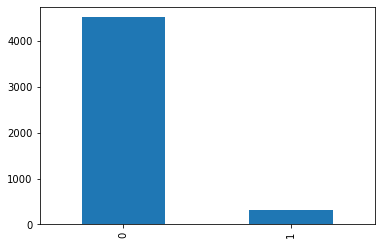

In [16]:
data["Bankrupt"].value_counts().plot(kind = "bar")

Since the minority class (Bankrupt) represents only 6.4% of the entire dataset, we have significant data imbalance. Since, some of the classifier models are sensitive to data imbalance, later on we will look at techniques to balance the data

Now, we look at Dimensionality Reduction techniques to see if we can reduce our feature space, without significant information loss. And if this adds value to our Model




## Dimensionality Reduction using PCA

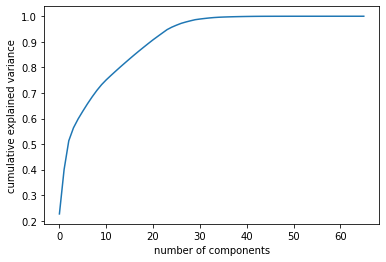

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Imputer = SimpleImputer()
data_imp = Imputer.fit_transform(data)
scalar = StandardScaler()
data_scale = scalar.fit_transform(data_imp)
pca = PCA()
pca.n_components
pca_out = pca.fit(data_scale)
data_pca = pca.transform(data_scale)

plt.plot(np.cumsum(pca_out.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [18]:
components = 45
pca_n = PCA(n_components=components)
pca_n = pca_n.fit(data_scale)
print("{:3.4f}% Variance explained by {:d} components".format(pca_n.explained_variance_ratio_.sum()*100,components))

99.9800% Variance explained by 45 components


We plan to use 32 PCA components for our model; reducing our feature size from 64 to 32 (50% reduction)

<Figure size 576x432 with 0 Axes>

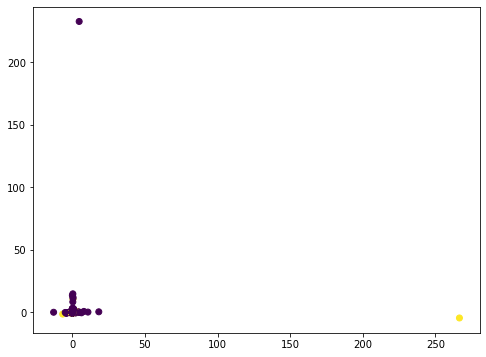

In [19]:
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=y)

# Preparing the Data and training the models

## Checking how upsampling affects the classifier

In [20]:
#Imputer Libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score

#PCA libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Sampling Libraries
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

#Classifier Libraries
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Gradient Boosting Classifier with SMOTE for Upsampling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)), ('smote', SMOTE()),
                ('scalar', StandardScaler()),
                ('GB', GradientBoostingClassifier())])

Performance Metrics with GB & SMOTE Upsampling

Accuracy Score: 0.9450
Balanced Accuracy Score: 0.8321
Precision Score:0.6049
Recall Score:0.7000


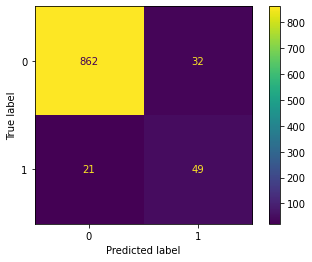

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       894
           1       0.60      0.70      0.65        70

    accuracy                           0.95       964
   macro avg       0.79      0.83      0.81       964
weighted avg       0.95      0.95      0.95       964




In [21]:
#Gradient Boosting Classifier with SMOTE (Synthetic Minority Oversampling Technique)
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=100)
scalar = StandardScaler()
smote = SMOTE()
GB = GradientBoostingClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("smote",smote),("scalar",scalar),("GB",GB)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics with GB & SMOTE Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print( f"{classification_report(y_test,y_pred)}\n")

### Gradient Boosting Classifier with ADASYN for Upsampling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('GB', GradientBoostingClassifier())])

Performance Metrics with GB & ADASYN Upsampling

Accuracy Score: 0.9357
Balanced Accuracy Score: 0.8205
Precision Score:0.5455
Recall Score:0.6857


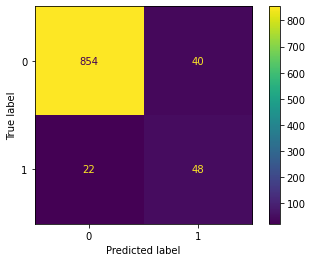

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       894
           1       0.55      0.69      0.61        70

    accuracy                           0.94       964
   macro avg       0.76      0.82      0.79       964
weighted avg       0.94      0.94      0.94       964




In [22]:
#Gradient Boosting Classifier with ADASYN (Adaptive Synthetic Sampling Approach)

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=100)
adasyn = ADASYN()
scalar = StandardScaler()
GB = GradientBoostingClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("GB",GB)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics with GB & ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_pred)}\n")

### Gradient Boosting Classifier without Upsampling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('scalar', StandardScaler()),
                ('GB', GradientBoostingClassifier())])

Performance Metrics GB without Upsampling

Accuracy Score: 0.9523
Balanced Accuracy Score: 0.7109
Precision Score:0.8333
Recall Score:0.4286


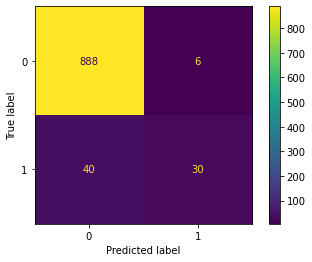

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       894
           1       0.83      0.43      0.57        70

    accuracy                           0.95       964
   macro avg       0.90      0.71      0.77       964
weighted avg       0.95      0.95      0.95       964




In [23]:
#Gradient Boosting Classifier without Upsampling

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=100)
scalar = StandardScaler()
GB = GradientBoostingClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("scalar",scalar),("GB",GB)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics GB without Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print( f"{classification_report(y_test,y_pred)}\n")

### If upsampling is not performed, the minority class (Bankrupt) is mislabelled much more, which causes the recall to drop as the False Negatives increases significantly

## Checking how PCA impacts classifiers

### Without PCA: Iteration of multiple classifiers with imputing, upsampling and standard scaling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', AdaBoostClassifier())])

ADA
Accuracy Score: 0.8994
Balanced Accuracy Score: 0.7548
Precision Score:0.3761
Recall Score:0.5857


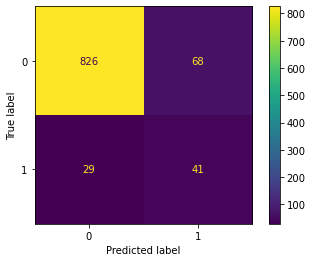

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       894
           1       0.38      0.59      0.46        70

    accuracy                           0.90       964
   macro avg       0.67      0.75      0.70       964
weighted avg       0.92      0.90      0.91       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', RandomForestClassifier())])

RF
Accuracy Score: 0.9367
Balanced Accuracy Score: 0.7091
Precision Score:0.5849
Recall Score:0.4429


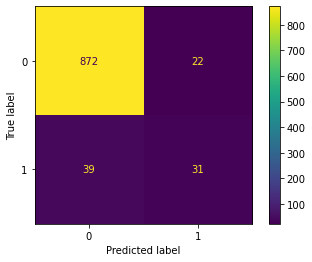

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       894
           1       0.58      0.44      0.50        70

    accuracy                           0.94       964
   macro avg       0.77      0.71      0.74       964
weighted avg       0.93      0.94      0.93       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', GaussianNB())])

GB
Accuracy Score: 0.1712
Balanced Accuracy Score: 0.5268
Precision Score:0.0767
Recall Score:0.9429


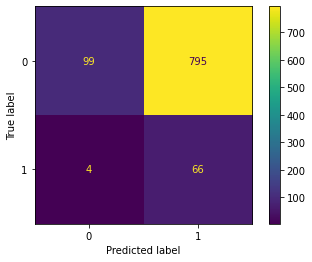

              precision    recall  f1-score   support

           0       0.96      0.11      0.20       894
           1       0.08      0.94      0.14        70

    accuracy                           0.17       964
   macro avg       0.52      0.53      0.17       964
weighted avg       0.90      0.17      0.19       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', BaggingClassifier())])

BC
Accuracy Score: 0.9253
Balanced Accuracy Score: 0.7622
Precision Score:0.4878
Recall Score:0.5714


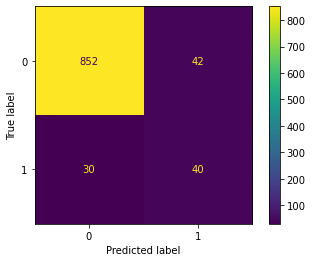

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       894
           1       0.49      0.57      0.53        70

    accuracy                           0.93       964
   macro avg       0.73      0.76      0.74       964
weighted avg       0.93      0.93      0.93       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', KNeighborsClassifier())])

kN
Accuracy Score: 0.8216
Balanced Accuracy Score: 0.6800
Precision Score:0.2069
Recall Score:0.5143


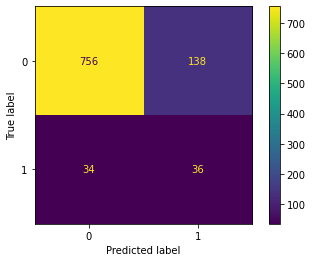

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       894
           1       0.21      0.51      0.30        70

    accuracy                           0.82       964
   macro avg       0.58      0.68      0.60       964
weighted avg       0.90      0.82      0.85       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', SVC())])

SVC
Accuracy Score: 0.8102
Balanced Accuracy Score: 0.7265
Precision Score:0.2189
Recall Score:0.6286


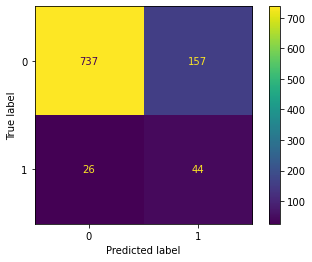

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       894
           1       0.22      0.63      0.32        70

    accuracy                           0.81       964
   macro avg       0.59      0.73      0.61       964
weighted avg       0.91      0.81      0.85       964




/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('clf', QuadraticDiscriminantAnalysis())])

QDA
Accuracy Score: 0.2614
Balanced Accuracy Score: 0.5228
Precision Score:0.0765
Recall Score:0.8286


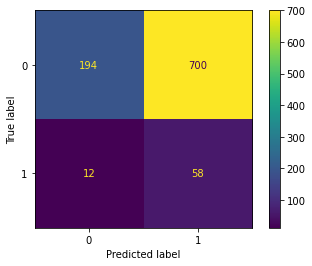

              precision    recall  f1-score   support

           0       0.94      0.22      0.35       894
           1       0.08      0.83      0.14        70

    accuracy                           0.26       964
   macro avg       0.51      0.52      0.25       964
weighted avg       0.88      0.26      0.34       964




In [24]:
#Non-PCA Iteration of multiple classifiers with imputing, upsampling and standard scaling
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating multiple classifier objects

Imputer = IterativeImputer(max_iter=100)
adasyn = ADASYN()
scalar = StandardScaler()
pca = PCA(n_components=45)
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = BaggingClassifier()
clf5 = KNeighborsClassifier()
clf6 = SVC()
clf7 = QuadraticDiscriminantAnalysis()

#Creating a pipeline object

for name, clf in {"ADA":clf1,"RF":clf2,"GB":clf3,"BC":clf4,"kN":clf5,"SVC":clf6,'QDA':clf7}.items():
    pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("Scalar",scalar),("clf",clf)])
    #Fitting our training data to the pipeline
    pipe.fit(X_train,y_train)
    #Predicting y_test on the pipeline
    y_pred = pipe.predict(X_test)
    print(name)
    print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
    print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
    print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
    print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
    disp.plot()
    plt.show()
    print(f"{classification_report(y_test,y_pred)}\n")

### With PCA: Iteration of multiple classifiers with imputing, upsampling and standard scaling

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', AdaBoostClassifier())])

ADA
Accuracy Score: 0.8371
Balanced Accuracy Score: 0.7279
Precision Score:0.2456
Recall Score:0.6000


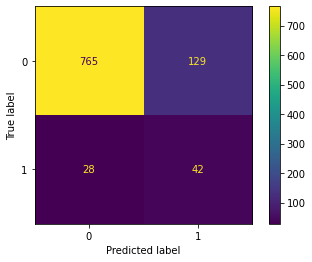

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       894
           1       0.25      0.60      0.35        70

    accuracy                           0.84       964
   macro avg       0.61      0.73      0.63       964
weighted avg       0.91      0.84      0.87       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)),
                ('clf', RandomForestClassifier())])

RF
Accuracy Score: 0.9118
Balanced Accuracy Score: 0.6760
Precision Score:0.3944
Recall Score:0.4000


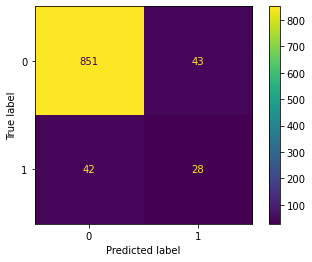

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       894
           1       0.39      0.40      0.40        70

    accuracy                           0.91       964
   macro avg       0.67      0.68      0.67       964
weighted avg       0.91      0.91      0.91       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', GaussianNB())])

GB
Accuracy Score: 0.1286
Balanced Accuracy Score: 0.4775
Precision Score:0.0694
Recall Score:0.8857


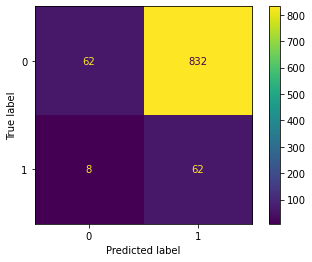

              precision    recall  f1-score   support

           0       0.89      0.07      0.13       894
           1       0.07      0.89      0.13        70

    accuracy                           0.13       964
   macro avg       0.48      0.48      0.13       964
weighted avg       0.83      0.13      0.13       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', BaggingClassifier())])

BC
Accuracy Score: 0.8932
Balanced Accuracy Score: 0.6461
Precision Score:0.3012
Recall Score:0.3571


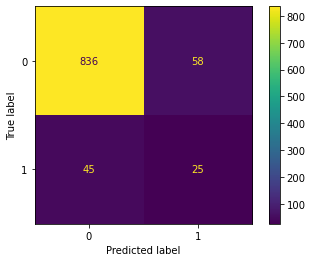

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       894
           1       0.30      0.36      0.33        70

    accuracy                           0.89       964
   macro avg       0.63      0.65      0.63       964
weighted avg       0.90      0.89      0.90       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)),
                ('clf', KNeighborsClassifier())])

kN
Accuracy Score: 0.8371
Balanced Accuracy Score: 0.6620
Precision Score:0.2119
Recall Score:0.4571


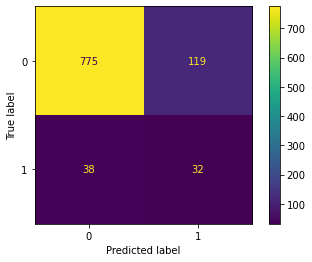

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       894
           1       0.21      0.46      0.29        70

    accuracy                           0.84       964
   macro avg       0.58      0.66      0.60       964
weighted avg       0.90      0.84      0.86       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)), ('clf', SVC())])

SVC
Accuracy Score: 0.8091
Balanced Accuracy Score: 0.7325
Precision Score:0.2206
Recall Score:0.6429


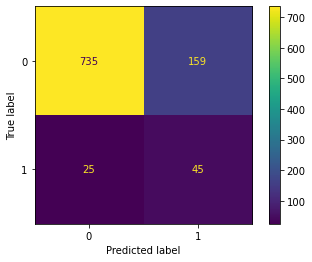

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       894
           1       0.22      0.64      0.33        70

    accuracy                           0.81       964
   macro avg       0.59      0.73      0.61       964
weighted avg       0.91      0.81      0.85       964




Pipeline(steps=[('Imputer', IterativeImputer(max_iter=100)),
                ('ADASYN', ADASYN()), ('Scalar', StandardScaler()),
                ('pca', PCA(n_components=45)),
                ('clf', QuadraticDiscriminantAnalysis())])

QDA
Accuracy Score: 0.2137
Balanced Accuracy Score: 0.5102
Precision Score:0.0743
Recall Score:0.8571


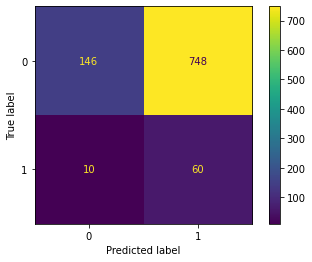

              precision    recall  f1-score   support

           0       0.94      0.16      0.28       894
           1       0.07      0.86      0.14        70

    accuracy                           0.21       964
   macro avg       0.51      0.51      0.21       964
weighted avg       0.87      0.21      0.27       964




In [25]:
#Iterating over a list of classifiers 


X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Imputer = IterativeImputer(max_iter=100)
adasyn = ADASYN()
scalar = StandardScaler()
pca = PCA(n_components=45)
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = BaggingClassifier()
clf5 = KNeighborsClassifier()
clf6 = SVC()
clf7 = QuadraticDiscriminantAnalysis()

#Creating a pipeline object


for name, clf in {"ADA":clf1,"RF":clf2,"GB":clf3,"BC":clf4,"kN":clf5,"SVC":clf6,'QDA':clf7}.items():
    pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("Scalar",scalar),('pca',pca),("clf",clf)])
    #Fitting our training data to the pipeline
    pipe.fit(X_train,y_train)
    #Predicting y_test on the pipeline
    y_pred = pipe.predict(X_test)
    print(name)
    print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
    print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
    print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
    print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
    disp.plot()
    plt.show()
    print(f"{classification_report(y_test,y_pred)}\n")

### As we can see, PCA is not improving the model performance, and hence, we can remove PCA from our transformation step

## Stacking Classifier

This classifier allows a stack of classifiers with a finaal classifier. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator. (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

Based on this paper (https://storm.cis.fordham.edu/~gweiss/papers/icdata-2019-imbalanced.pdf), Decision Tree, ADABoost and Gradient Boosting perform best as compared to other classifiers in event of data imbalance

Hence we use Decision Tree, ADABoost and Gradient Boosting in a stacking classifier without upsampling

/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:31:54] WARNING: /private/var/folders/hb/h5fq4t0j2mb5r4wgcdmy2gth0000gn/T/pip-install-x8xta0ai/xgboost_1e83477c2bba479c9db6d63859da1e3f/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:32:14] WARNING: /private/var/folders/hb/h5fq4t0j2mb5r4wgcdmy2gth0000gn/T/pip-install-x8xta0ai/xgboost_1e83477c2bba479c9db6d63859da1e3f/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:32:16] WARNING: /private/var/folders/hb/h5fq4t0j2mb5r4wgcdmy2gth0000gn/T/pip-install-x8xta0ai/xgboost_1e83477c2bba479c9db6d63859da1e3f/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:32:17] WARNING: /private/var/folders/hb/h5fq4t0j2mb5r4wgcdmy2gth0000gn/T/pip-install-x8xta0ai/xgboost_1e83477c2bba479c9db6d63859da1e3f/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:32:18] WARNING: /private/var/folders/hb/h5fq4t0j2mb5r4wgcdmy2gth0000gn/T/pip-install-x8xta0ai/xgboost_1e83477c2bba479c9db6d63859da1e3f/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:32:19] WARNING: /private/var/folders/hb/h5fq4t0j2mb5r4wgcdmy2gth0000gn/T/pip-install-x8xta0ai/xgboost_1e83477c2bba479c9db6d63859da1e3f/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('Imputer',
                 IterativeImputer(initial_strategy='median', max_iter=500)),
                ('Scalar', StandardScaler()),
                ('clf',
                 StackingClassifier(estimators=[('dt',
                                                 DecisionTreeClassifier(ccp_alpha=0.01,
                                                                        max_depth=4)),
                                                ('gb',
                                                 GradientBoostingClassifier()),
                                                ('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_.

Accuracy Score: 0.9575
Balanced Accuracy Score: 0.7466
Precision Score:0.8537
Recall Score:0.5000


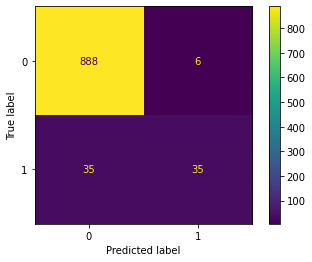

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       894
           1       0.85      0.50      0.63        70

    accuracy                           0.96       964
   macro avg       0.91      0.75      0.80       964
weighted avg       0.95      0.96      0.95       964




In [26]:

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=500,initial_strategy='median')
scalar = StandardScaler()
ada = AdaBoostClassifier(n_estimators =500)
dt = DecisionTreeClassifier(ccp_alpha=0.01,max_depth=4)
gb = GradientBoostingClassifier(n_estimators=100)
xgb = XGBClassifier(max_depth=4)
estimators = [('dt', dt),('gb',gb),('xgb',xgb)]

clf = StackingClassifier(estimators=estimators, final_estimator=ada)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("Scalar",scalar),("clf",clf)])
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics

print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_pred)}\n")

While the stacking classfier, gives high accuracy and precision, recall is more important under the assumption that predicting bankrupty is more important than solvency

## ADABoosting Classifier

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=500)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('ada', AdaBoostClassifier(n_estimators=500))])

Performance Metrics with ADABoosting and ADASYN Upsampling

Accuracy Score: 0.9326
Balanced Accuracy Score: 0.7661
Precision Score:0.5333
Recall Score:0.5714


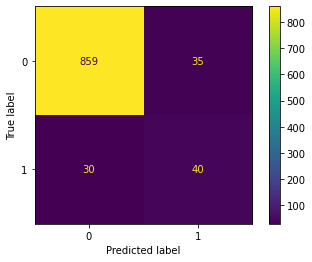

[0.94033722 0.92866407 0.94293126 0.92347601 0.93636364]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       894
           1       0.53      0.57      0.55        70

    accuracy                           0.93       964
   macro avg       0.75      0.77      0.76       964
weighted avg       0.93      0.93      0.93       964




In [27]:
#AdaBoosting Classifier with ADASYN (Adaptive Synthetic Sampling Approach)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = 5
#Initializing objects
Imputer = IterativeImputer(max_iter=500)
adasyn = ADASYN()
scalar = StandardScaler()
dt = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, max_features='log2')
ada = AdaBoostClassifier(n_estimators=500,learning_rate=1.0)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("ada",ada)])
#Cross Validating our data
cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)

#Performance Metrics
print("Performance Metrics with ADABoosting and ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
print(cross_val)
print(f"{classification_report(y_test,y_pred)}\n")

# HyperTuning Decision Tree Classifier using GridSearchCV

Fine tuning the model using GridSearchCV

Marking down the code, since it takes significant run time

#Running a GridSearchCV to find the best parameters for the DecisionTree Classifier with ADASYN 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = 5
#Initializing objects
Imputer = IterativeImputer(max_iter=500)
adasyn = ADASYN()
scalar = StandardScaler()
dt = DecisionTreeClassifier()

param_grid = {
              'dt__max_features': ['auto','log2','sqrt'],
              'dt__ccp_alpha': [0.1, .01, .001],
              'dt__max_depth' : [2, 6, 10],
              'dt__criterion' :['gini', 'entropy']
             }

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("dt",dt)])
#Cross Validating our data

grid_search = GridSearchCV(pipe, param_grid=param_grid)
#cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
#Fitting our training data to the pipeline
grid_search.fit(X_train,y_train)
#Predicting y_test on the pipeline
#y_pred = pipe.predict(X_test)
final_model = grid_search.best_estimator_

#Performance Metrics
print("Performance Metrics with ADABoosting and ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
#print(cross_val)
print(final_model)

Pipeline(steps=[('Imputer', IterativeImputer(max_iter=500)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2,
                                        max_features='log2'))])


#ADAboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Imputer = IterativeImputer(max_iter=500)
smote = SMOTE()
scalar = StandardScaler()
pca = PCA(n_components=32)

param_grid = {
    "ADA__n_estimators": [10, 50, 100, 500],
    "ADA__learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]
}


#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf1 = AdaBoostClassifier()

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("smote",smote),("Scalar",scalar),('pca',pca),("ADA",clf1)])
grid_search = GridSearchCV(pipe, param_grid, n_jobs=1)

grid_result = grid_search.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Best: 0.865597 using {'ADA__learning_rate': 1.0, 'ADA__n_estimators': 500}

Pipeline(steps=[('Imputer',
                 IterativeImputer(initial_strategy='median', max_iter=1000)),
                ('ADASYN', ADASYN()), ('scalar', StandardScaler()),
                ('ada',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                                          max_depth=5,
                                                                          max_features='auto'),
                                    learning_rate=0.1, n_estimators=500))])

Performance Metrics with ADABoosting and ADASYN Upsampling

Accuracy Score: 0.9201
Balanced Accuracy Score: 0.8450
Precision Score:0.4690
Recall Score:0.7571


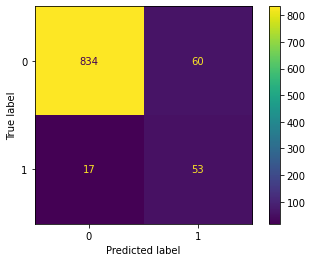

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       894
           1       0.47      0.76      0.58        70

    accuracy                           0.92       964
   macro avg       0.72      0.85      0.77       964
weighted avg       0.94      0.92      0.93       964




In [28]:
# AdaBoost Classifier with DecisionTree as base estimator
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SVMSMOTE
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = 5
#Initializing objects
Imputer = IterativeImputer(initial_strategy = 'median',max_iter=1000)
adasyn = ADASYN()
scalar = StandardScaler()
dt = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='auto')

ada = AdaBoostClassifier(base_estimator=dt,learning_rate=0.1,n_estimators=500)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("ada",ada)])

#cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)


#Performance Metrics
print("Performance Metrics with ADABoosting and ADASYN Upsampling\n")
print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
#print(cross_val)
print(f"{classification_report(y_test,y_pred)}\n")

/Users/tejashriprabhu/miniforge3/envs/env_tf/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:34:47] WARNING: /private/var/folders/hb/h5fq4t0j2mb5r4wgcdmy2gth0000gn/T/pip-install-x8xta0ai/xgboost_1e83477c2bba479c9db6d63859da1e3f/build/temp.macosx-11.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('Imputer', IterativeImputer(max_iter=1000)),
                ('scalar', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,


Accuracy Score: 0.9627
Balanced Accuracy Score: 0.7692
Precision Score:0.9048
Recall Score:0.5429


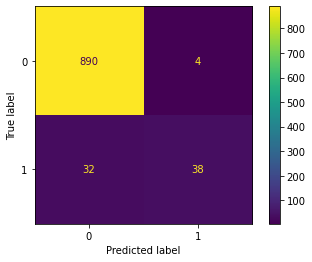

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       894
           1       0.90      0.54      0.68        70

    accuracy                           0.96       964
   macro avg       0.94      0.77      0.83       964
weighted avg       0.96      0.96      0.96       964




In [29]:
#XGB
X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing objects
Imputer = IterativeImputer(max_iter=1000)
adasyn = ADASYN()
scalar = StandardScaler()
xgb = XGBClassifier(n_estimators=100)

#Creating a pipeline object
pipe = Pipeline(steps=[("Imputer",Imputer),("scalar",scalar),("xgb",xgb)])

#cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
#Fitting our training data to the pipeline
pipe.fit(X_train,y_train)
#Predicting y_test on the pipeline
y_pred = pipe.predict(X_test)


#Performance Metrics

print("Accuracy Score: {:3.4f}".format(accuracy_score(y_test,y_pred)))
print("Balanced Accuracy Score: {:3.4f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Precision Score:{:3.4f}".format(precision_score(y_test,y_pred)))
print("Recall Score:{:3.4f}".format(recall_score(y_test,y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()
#print(cross_val)
print(f"{classification_report(y_test,y_pred)}\n")

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [30]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [31]:

import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

X = data.drop(columns = ['Bankrupt','Id'])
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Classifier with DecisionTree as base estimator
def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
   
    a = data.drop(columns = ['Bankrupt','Id'])
    b = data['Bankrupt']
    X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42)
    #Initializing objects
    Imputer = IterativeImputer(initial_strategy = 'median',max_iter=1000)
    adasyn = ADASYN()
    scalar = StandardScaler()
    dt = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='auto')

    ada = AdaBoostClassifier(base_estimator=dt,learning_rate=0.1,n_estimators=500)

    #Creating a pipeline object
    pipe = Pipeline(steps=[("Imputer",Imputer),("ADASYN",adasyn),("scalar",scalar),("ada",ada)])

    #cross_val = cross_val_score(pipe, X_train, y_train, cv=cv)
    #Fitting our training data to the pipeline
    pipe.fit(X_train,y_train)
    #Predicting y_test on the pipeline
    y_pred = pipe.predict(X)

    predictions = y_pred
    # YOUR CODE GOES HERE
    
    
    return predictions



# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

	ADABoosting with ADASYN Upsampling Accuracy: 92.2%, Recall 71.4%, Precision 47.6%


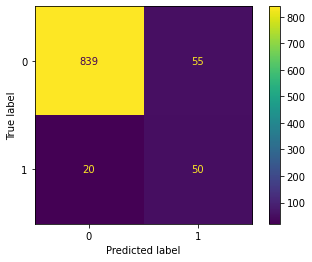

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       894
           1       0.48      0.71      0.57        70

    accuracy                           0.92       964
   macro avg       0.73      0.83      0.76       964
weighted avg       0.94      0.92      0.93       964




In [34]:
name = "ADABoosting with ADASYN Upsampling"
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred))
disp.plot()
plt.show()
print(f"{classification_report(y_test,y_test_pred)}\n")

# Conclusion:

As per the Recipe for ML:
- I started with a Baseline Model
- Exploratory data analysis: I visualized the dataset, saw the data imbalance, perfomed a PCA
- Next, I performed upsampling to manage the data imbalance, and checked if sampling methods add value to the models
- Also, ran a PCA vs non PCA model test to see the impact of PCA 
- Applied transformations such as scalar, and different upsampling methods
- Trained different models and calculated their performance metrics
- Fine Tuned the hyperparameters using GridSearchCV

The reason for choosing the "ADABoost with decision tree as base estimator" model is that it achieves much better recall than the other models with a decent precision. Since, we are finding out if a company may go bankrupt, having a higher recall (sensitivity) over precision is preferred. As there is a higher cost associated with a false negative,(if a bankrupt company is identified as solvent). On the other hand, we can't have a very low precision either, as that would imply that most solvent companies start being classified as bankrupt too, which again is bad for business. This model gave the best tradeoff between precision and recall, and hence I picked this model.